# Exercises 3, answers

In [1]:
def objective_function(x): # function to be optimized
    return (x[0]**2.0 + x[1]**2.0 + x[0] + 2.0 * x[1])

$\nabla f(x) = (2x_1+1,2x_2+2)=0$ if and only if $x_1=-0.5$ and $x_2 = -1.0$. Thus $x^*=(-0.5,-1.0)$.

## Task 1
* max 3 points, 3 points if one gets correct solution and line search is properly done, reductions if something is not done correctly

In [2]:
import math
def golden_section_line_search(a,b,f,L): # same as in the lectures
    x = a
    y = b
    while y-x>2*L:
        if f(x+(math.sqrt(5.0)-1)/2.0*(y-x))<f(y-(math.sqrt(5.0)-1)/2.0*(y-x)):
            x = y-(math.sqrt(5.0)-1)/2.0*(y-x)
        else:
            y = x+(math.sqrt(5.0)-1)/2.0*(y-x)
    return (x+y)/2

In [3]:
import numpy as np
import ad
def steepest_descent_withgolden(f,start,search_interval_length,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
    while abs(f_old-f_new)>precision and len(steps)<100:
#    while np.linalg.norm(d)>precision:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x)) # search direction of the steepest descent
        # step length optimization with golden section
        step = golden_section_line_search(0,
                                          search_interval_length/np.linalg.norm(d), # normalization, can be done earlier as well
                                          lambda t: f(x+t*d), # function with respect to step length t
                                          precision)
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [4]:
start = [-5,10]
precision = 0.0001
(x,f_new,steps1) = steepest_descent_withgolden(objective_function,
                                               start,20,precision)
print (x)
print(len(steps1))
print(steps1)

[-0.50000001 -0.99999998]
2
[[-0.4996553033929336, -1.0008425917061619], [-0.5000000089498053, -0.999999978122698]]


In [5]:
# alternative implementation by scaling the search direction 
def steepest_descent_withgolden_scaled(f,start,search_interval_length,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
    while abs(f_old-f_new)>precision and len(steps)<100:
#    while np.linalg.norm(d)>precision:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x)) # search direction of the steepest descent
        # normalize d so that the length of the step is actually equal to step
        d = d/np.linalg.norm(d)
        # step length optimization with golden section
        step = golden_section_line_search(0,
                                          search_interval_length, 
                                          lambda t: f(x+t*d), # function with respect to step length t
                                          precision)
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [6]:
(x,f_new,steps3) = steepest_descent_withgolden_scaled(objective_function,
                                               start,20,precision)
print (x)
print(len(steps3))
print(steps3)

[-0.49997332 -1.00006523]
2
[[-0.5000098340619141, -0.9999759611819865], [-0.49997331539466816, -1.0000652290352587]]


In [7]:
import matplotlib.pyplot as plt

def plot_2d_steps(steps,start):
    myvec = np.array([start]+steps).transpose()
    plt.plot(myvec[0,],myvec[1,],'bo')
    return plt

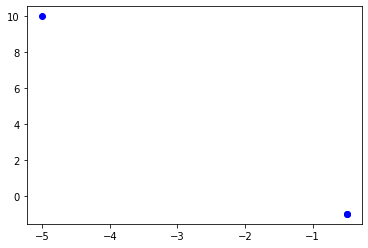

In [8]:
plot_2d_steps(steps3,start).show()

## Task 2
* max 2 points, 1 point for plot, 1 point if there is comparison/analysis

In [9]:
import numpy as np
import ad
def steepest_descent(f,start,step,precision): # from the lectures
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
#    while abs(f_old-f_new)>precision and len(steps)<10:
    while np.linalg.norm(d)>precision and len(steps)<20:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x))
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [10]:
step = 0.2
(x,f_new,steps2) = steepest_descent(objective_function,start,step,precision)
print(x)
print(len(steps2))
print(steps2)

[-0.50016453 -0.99959782]
20
[[-3.2, 5.6], [-2.12, 2.9599999999999995], [-1.472, 1.3759999999999997], [-1.0832, 0.42559999999999987], [-0.84992, -0.1446400000000001], [-0.709952, -0.4867840000000001], [-0.6259712, -0.6920704000000001], [-0.57558272, -0.8152422400000001], [-0.545349632, -0.8891453440000001], [-0.5272097792, -0.9334872064], [-0.51632586752, -0.96009232384], [-0.5097955205119999, -0.976055394304], [-0.5058773123072, -0.9856332365824], [-0.50352638738432, -0.99137994194944], [-0.502115832430592, -0.994827965169664], [-0.5012694994583552, -0.9968967791017984], [-0.5007616996750132, -0.998138067461079], [-0.5004570198050079, -0.9988828404766474], [-0.5002742118830047, -0.9993297042859884], [-0.5001645271298029, -0.999597822571593]]


In [11]:
def plot_2d_steps2(steps1,start1,steps2,start2):
    myvec1 = np.array([start1]+steps1).transpose()
    myvec2 = np.array([start2]+steps2).transpose()
    plt.plot(myvec2[0,],myvec2[1,],'bo')    
    plt.plot(myvec1[0,],myvec1[1,],'rx')
    return plt

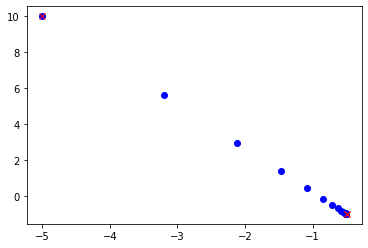

In [12]:
plot_2d_steps2(steps1,start,steps2,start).show() # optimized blue, fixed red

**Remarks**
* With fixed step size the steps are not actually of equal length since the step size is multiplied with the gradient whose length varies
* The performance of steepest descent with optimized step size also depends on what is set as the maximum step length
  * too long --> golden section search uses a high nuber of function evaluations
  * too short --> takes shorter steps where improvement could still be made with longer ones

## Task 3
* max 3 points, 3 points if one gets correct result, reductions is there are flaws

$$y_k=\nabla f(x_k+s_k)-\nabla f(x_k),$$

$$s_k=x_{k+1} -x_k=(x_k+s_k)-x_k$$

$$H_{k+1}=H_{k}-\frac{H_k y_k y_k^T H_k}{y_k^T H_k y_k}+\frac{s_k s_k^T}{y_k^{T} s_k}$$

In [13]:
import ad
import numpy as np
def update_Hinv(H_inv_old,x_old,x_new,f): # subroutine to update inverse of the Hessian
    y = np.matrix(ad.gh(f)[0](x_new)-ad.gh(f)[0](x_old)).transpose() # compute y_k
    second_term = H_inv_old*y*y.transpose()*H_inv_old/(y.transpose()*H_inv_old*y)
#    second_term = H_inv_old*y*y.transpose()*H_inv_old.transpose()/(y.transpose()*H_inv_old*y)
    s = np.matrix(x_new-x_old).transpose() # compute s_k
    third_term = s*s.transpose()/(y.transpose()*s)
    H_inv_new = H_inv_old-second_term+third_term
    return H_inv_new

In [14]:
import numpy as np
def quasi_newton_DFP(f,start,step,precision):
    f_old = float('Inf')
    x_new = np.array(start)
    steps = []
    f_new = f(x_new)
    # Use identity matrix as the first approximation (is positive definite, first search direction is the steepest descent)
    H_inv = np.eye(len(start))
    d = float('Inf')
#    while abs(f_old-f_new)>precision and len(steps)<20:
    while np.linalg.norm(d)>precision and len(steps)<20:
        d = (-H_inv*(np.matrix(ad.gh(f)[0](x_new)).transpose())).transpose()
        x_old = x_new
        f_old = f_new
        #Change the type from np.matrix to np.array so that we can use it in our function
        x_new = np.array(x_new+d*step)[0]
        f_new = f(x_new)
        steps.append(list(x_new))
        H_inv = update_Hinv(H_inv,x_old,x_new,f)
    return x_new,f_new,steps,H_inv

In [15]:
start = [-3,2]
(x,f_new,steps,H_inv)=quasi_newton_DFP(objective_function,start,0.4,precision)
print(x)
print(len(steps))
print (steps)

[-0.50003047 -0.99996344]
20
[[-1.0, -0.40000000000000036], [-0.7999999999999999, -0.6400000000000001], [-0.68, -0.7840000000000001], [-0.6079999999999999, -0.8704000000000001], [-0.5648000000000001, -0.9222400000000002], [-0.5388799999999999, -0.953344], [-0.5233280000000001, -0.9720064000000002], [-0.5139967999999999, -0.9832038399999999], [-0.5083980800000001, -0.9899223040000001], [-0.5050388479999999, -0.9939533824], [-0.5030233088000001, -0.9963720294400001], [-0.5018139852799999, -0.997823217664], [-0.5010883911680001, -0.9986939305984002], [-0.5006530347007998, -0.99921635835904], [-0.5003918208204801, -0.9995298150154242], [-0.5002350924922878, -0.9997178890092543], [-0.5001410554953729, -0.9998307334055527], [-0.5000846332972235, -0.9998984400433315], [-0.5000507799783344, -0.9999390640259991], [-0.5000304679870003, -0.9999634384155992]]


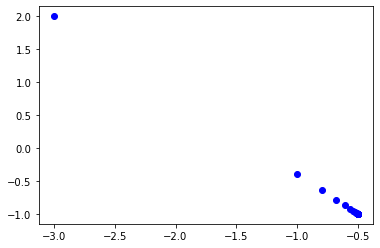

In [16]:
plot_2d_steps(steps,start).show()

In [17]:
print("solution ",x)
print("objective value ",objective_function(x))
print("----- exact inverse Hessian at ",x," ------")
print(np.linalg.inv(ad.gh(objective_function)[1](x)))
print("----- approximation of the inverse Hessian at ",x," ------")
print(H_inv)

solution  [-0.50003047 -0.99996344]
objective value  -1.2499999977349523
----- exact inverse Hessian at  [-0.50003047 -0.99996344]  ------
[[0.5 0. ]
 [0.  0.5]]
----- approximation of the inverse Hessian at  [-0.50003047 -0.99996344]  ------
[[0.79508197 0.24590164]
 [0.24590164 0.70491803]]


*Convergence of the approximations to exact inverse of the Hessian depend on the properties of the problem and the update rule used.*

More information in 
https://en.wikipedia.org/wiki/Quasi-Newton_method